This notebook experiments with the various hyperparamters in the models using surprise library and also compares the different models based on RMSE and MAE.

In [1]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 31.1 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633716 sha256=576051bd3bf1defbc64cfe085026f3c4c6ec7ee2adfed775042df0e6eecdc2fc
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [2]:
from surprise import SVD, SVDpp
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import KNNBasic, KNNWithMeans
from surprise import accuracy
from surprise.model_selection import train_test_split

In [3]:
import time
import pandas as pd

##### Fine Tuning Hyperparameters:

In [4]:
from surprise import NormalPredictor
from surprise.model_selection import RandomizedSearchCV

In [5]:
# Load the movielens-1M dataset
data = Dataset.load_builtin('ml-100k')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


1. SVD and SVDpp

In [6]:
param_grid = {'n_factors':[25,50,100], 'n_epochs': [5, 10, 20], 'lr_all': [0.01, 0.02], 'reg_all': [0.01,0.02]}
gs = RandomizedSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5)

gs.fit(data)

# best RMSE & MAE score
print(gs.best_score['rmse'])
print(gs.best_score['mae'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9351646321153192
0.7374341753174393
{'n_factors': 25, 'n_epochs': 10, 'lr_all': 0.01, 'reg_all': 0.02}


2. Chaning number of neighbors for KNN

In [8]:
from surprise.model_selection import GridSearchCV

In [9]:
param_grid = {'k': [15, 20, 25, 30, 40, 50, 60]}

knnbasic_gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=5)
knnbasic_gs.fit(data)

knnmeans_gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=5)
knnmeans_gs.fit(data)

In [10]:
x = [15, 20, 25, 30, 40, 50, 60]
y1 = knnbasic_gs.cv_results['mean_test_rmse']
y2 = knnbasic_gs.cv_results['mean_test_mae']

y3 = knnmeans_gs.cv_results['mean_test_rmse']
y4 = knnmeans_gs.cv_results['mean_test_mae']

In [11]:
import matplotlib.pyplot as plt

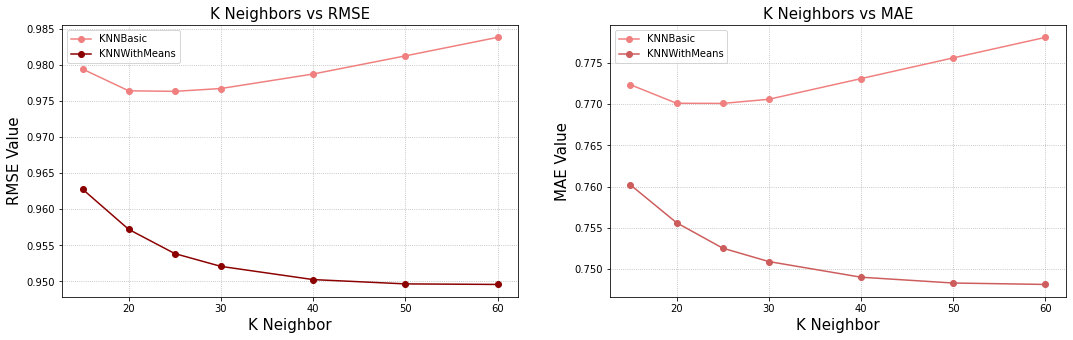

In [13]:
plt.figure(figsize=(18,5))

plt.subplot(1, 2, 1)
plt.title('K Neighbors vs RMSE', loc='center', fontsize=15)
plt.plot(x, y1, label='KNNBasic', color='lightcoral', marker='o')
plt.plot(x, y3, label='KNNWithMeans', color='darkred', marker='o')
plt.xlabel('K Neighbor', fontsize=15)
plt.ylabel('RMSE Value', fontsize=15)
plt.legend()
plt.grid(ls='dotted')

plt.subplot(1, 2, 2)
plt.title('K Neighbors vs MAE', loc='center', fontsize=15)
plt.plot(x, y2, label='KNNBasic', color='lightcoral', marker='o')
plt.plot(x, y4, label='KNNWithMeans', color='indianred', marker='o')
plt.xlabel('K Neighbor', fontsize=15)
plt.ylabel('MAE Value', fontsize=15)
plt.legend()
plt.grid(ls='dotted')

plt.show()